# Question 01

In [2]:
# Include all the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
#import pandas as pd


In [4]:
#import image as grayscale image and display it using openCV 

img = cv.imread("D:\Semester-05\EN3160 - Image Processing and Machine Vision\Assignments\A01 Intensity Transformations and Neighborhood Filtering\emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
cv.imshow("images",img)
cv.waitKey(0)
cv.destroyAllWindows()

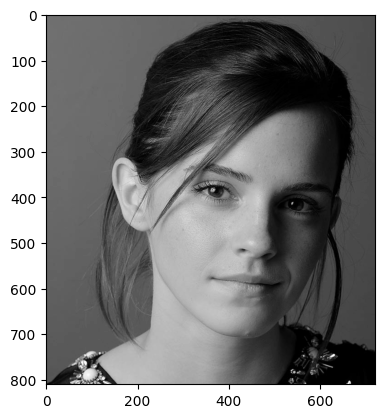

In [ ]:
# Display using Matplotlib

fig,ax = plt.subplots()

ax.imshow(img,cmap="gray")
ax.set_title("")
plt.show()

In [52]:
# Display Image properties

print(img.shape)
print(img.size)
print(img.dtype)

(810, 720)
583200
uint8


51
100
105
256


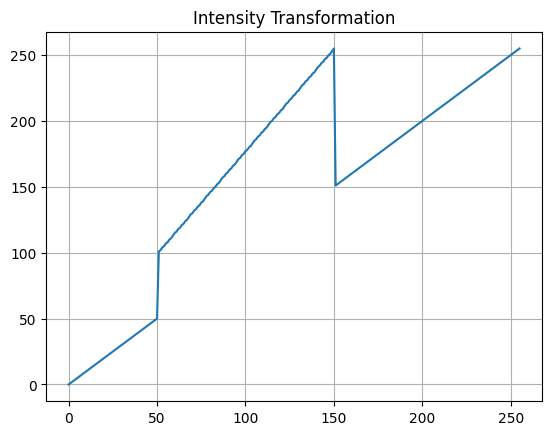

In [53]:
# Create Intensity Transformer

c= np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.grid()
plt.show()

In [54]:
# Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# Display Original Image
cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
cv.imshow("Original image",img)
cv.waitKey(0)
# Display Transformed Image
cv.namedWindow("Transformed image",cv.WINDOW_AUTOSIZE)
cv.imshow("Transformed image",transformed_image)
cv.waitKey(0)
cv.destroyAllWindows()

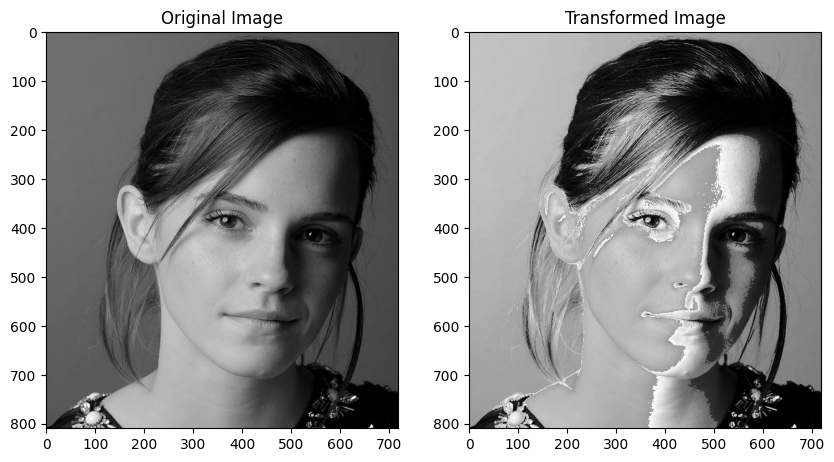

In [55]:
#visualize using matplotlib

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")
plt.show()

# Question 02

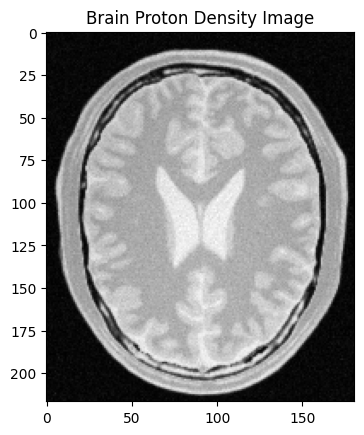

In [56]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# opening the image and visualizing using matplotlib

img = cv.imread("images/BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)

# cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
# cv.imshow("images",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax =plt.subplots()

ax.imshow(img,cmap="gray")
ax.set_title("Brain Proton Density Image")
plt.show()



51
130
75
256


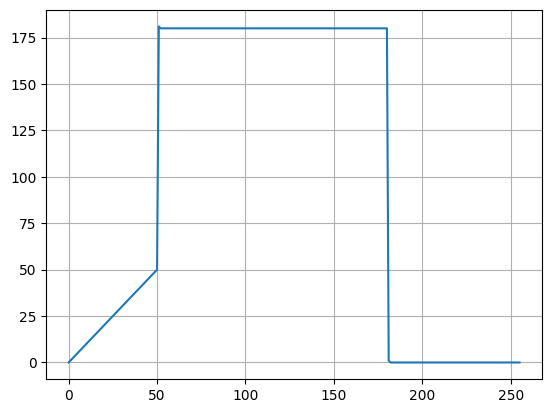

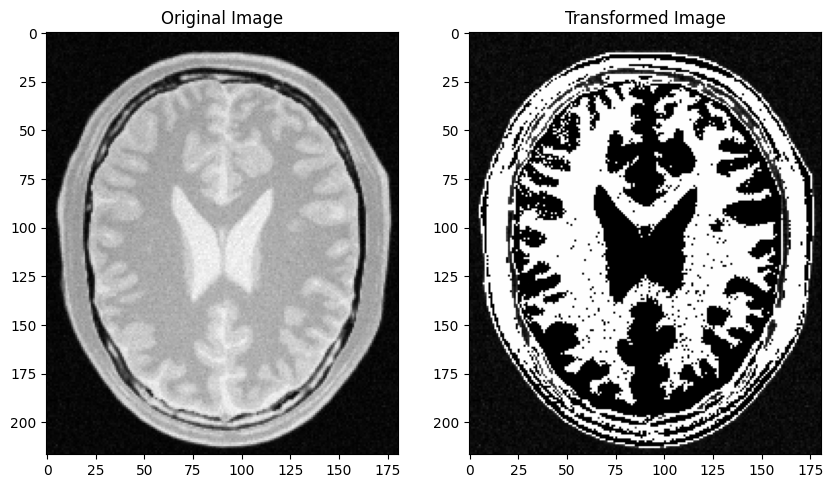

In [57]:
# Enhancing grey matte using intensiy transformations

c= np.array([(50,50),(50,180),(180,180),(180,0)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,0,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()

# # Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()






51
130
75
256


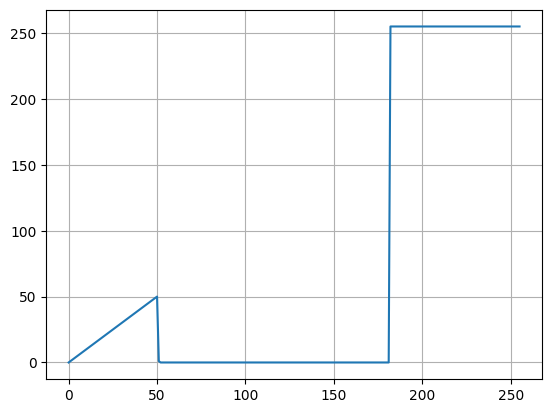

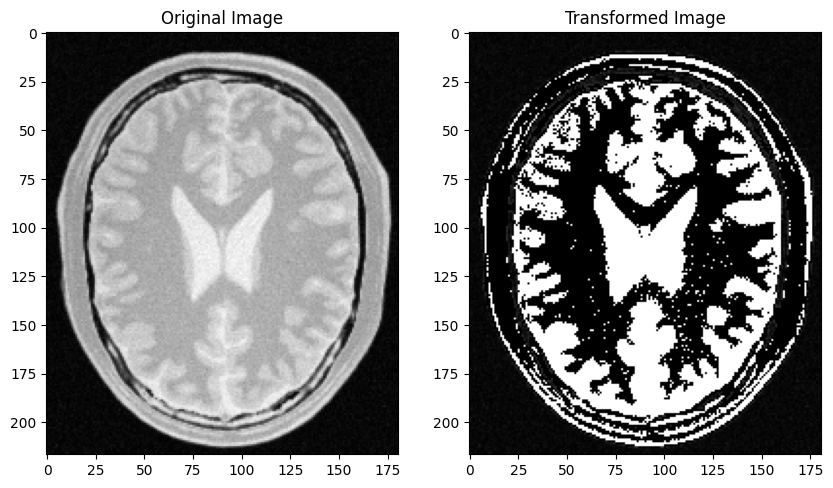

In [58]:
# Enhancing white matte using intensiy transformations

c= np.array([(50,50),(50,0),(180,0),(180,255)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()

# # Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)
# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()


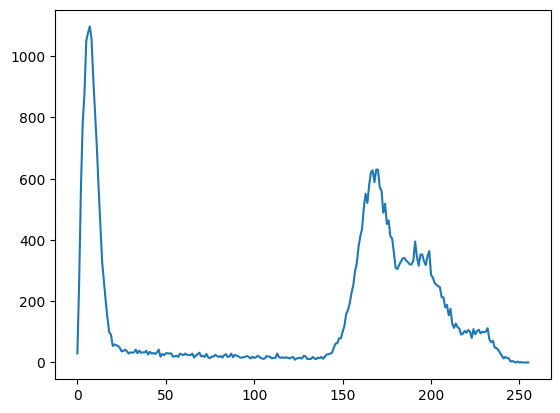

In [59]:
# Doing Histogram Equalization
# Visualizing the Histograms

hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)

plt.show()

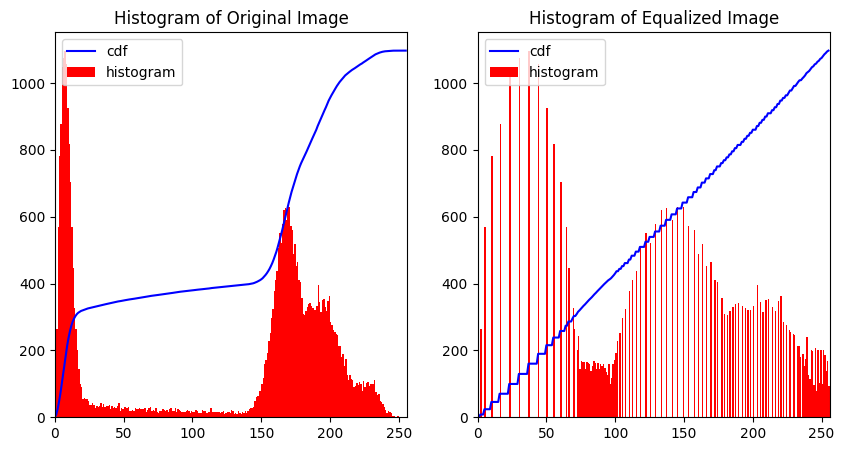

In [60]:
#Creating Histograms
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()


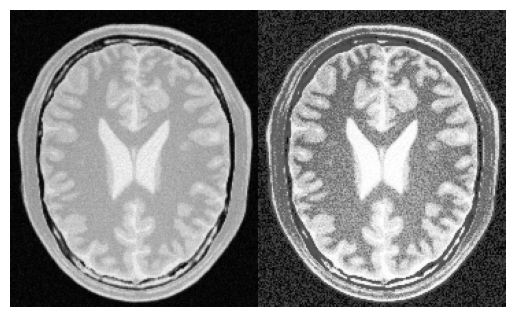

In [61]:

res=np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

# Question 03

Text(0.5, 1.0, 'Histogram of Equalized Image')

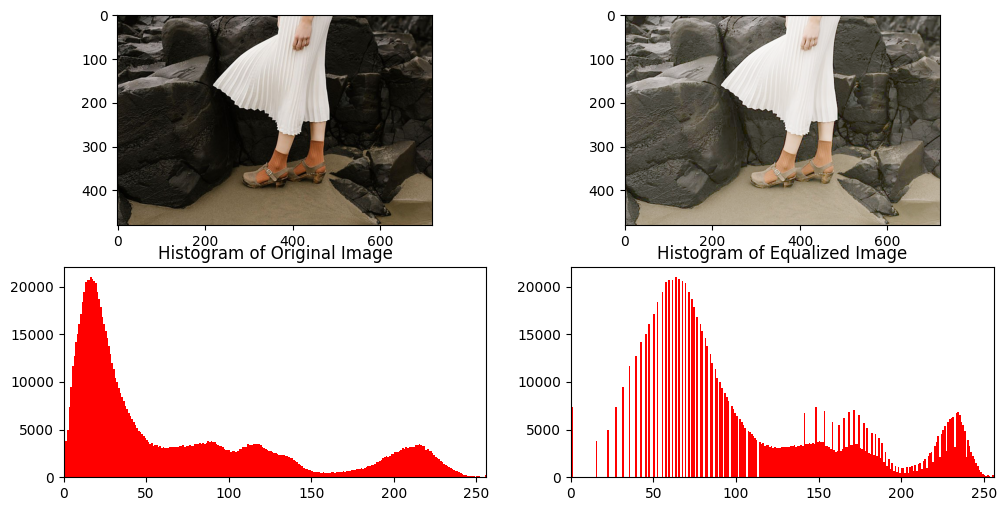

In [62]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread("images/highlights_and_shadows.jpg",cv.IMREAD_COLOR).astype('uint8')
gamma = 0.5
table = np.array([(i/255)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table).astype('uint8')

img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(img_orig)
ax[0,1].imshow(img_gamma)


ax[1,0].hist(img_orig.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(img_gamma.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# ax[2,0].plot(table)
# ax[2,0].set_xlim(0,255)
# ax[2,0].set_ylim(0,255)
# ax[2,0].set_aspect('equal')

Text(0.5, 1.0, 'Histogram of Equalized Image')

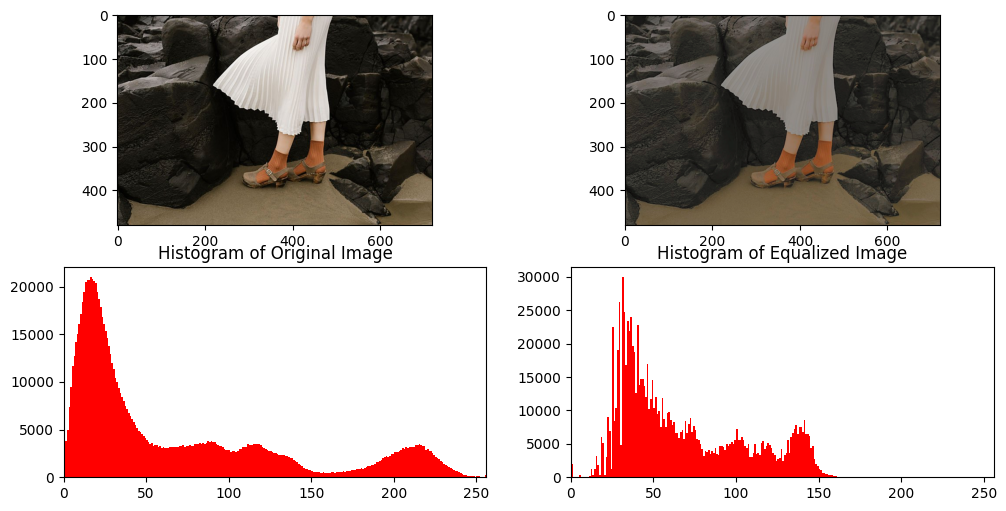

In [6]:
import cv2
import numpy as np

def apply_gamma_correction(image_lab, gamma):

    global L,L_corrected
    # Split the LAB image into L*, a*, and b* channels
    L, a, b = cv2.split(image_lab)

    # Apply gamma correction to the L* channel
    L_corrected = np.power(L / 100.0, gamma) * 100.0

    # Ensure the corrected L* channel is in the appropriate data range
    L_corrected = np.clip(L_corrected, 0, 255).astype('uint8')

    # Merge the corrected L* channel with the original a* and b* channels
    corrected_lab = cv2.merge([L_corrected, a, b])

    

    return corrected_lab

# Load the image in BGR color space
image_bgr = cv2.imread("D:\Semester-05\EN3160 - Image Processing and Machine Vision\Assignments\A01 Intensity Transformations and Neighborhood Filtering\highlights_and_shadows.jpg")

# Convert the image to LAB color space
image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

# Set the desired gamma value (e.g., 2.2 for standard gamma correction)
gamma = 0.5

# Apply gamma correction to the LAB image
corrected_image_lab = apply_gamma_correction(image_lab, gamma)

# Convert the corrected LAB image back to BGR color space
corrected_image_bgr = cv2.cvtColor(corrected_image_lab, cv2.COLOR_LAB2BGR)

# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_bgr, cv2.COLOR_BGR2RGB))


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# ax[2,0].plot(table)
# ax[2,0].set_xlim(0,255)
# ax[2,0].set_ylim(0,255)
# ax[2,0].set_aspect('equal')


# Save the corrected image
# cv2.imwrite('corrected_image.jpg', corrected_image_bgr)

# Qustion 04


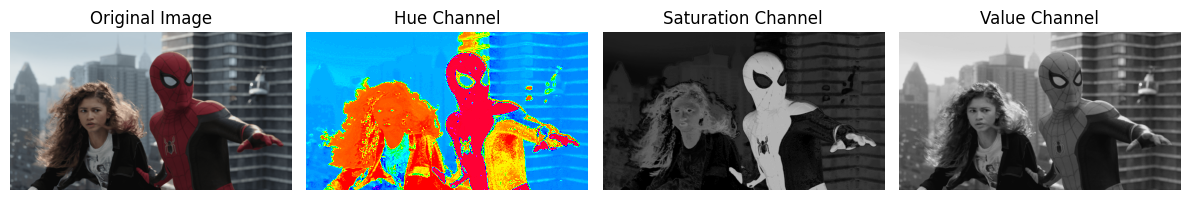

In [103]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR color space
image_bgr = cv2.imread("images/spider.png")

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue, saturation, value = cv2.split(image_hsv)

# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='hsv', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [65]:
def satIntensityTransformer(x,alpha,zigma):
    
    transformer = x +(alpha*128)*np.exp((-(x-128)**2)/(2*(zigma**2)))
    # transformer = 1.5*x

    return min(transformer,255)

In [104]:
transformed_saturation= np.zeros(saturation.shape)

In [106]:
for i in range(len(saturation)):
    for j in range(len(saturation[i])):
        # print(transformed_saturation[i][j])
        transformed_saturation[i][j] = satIntensityTransformer(saturation[i][j],0.7,70)

In [107]:
transformed_saturation=transformed_saturation.astype('uint8')

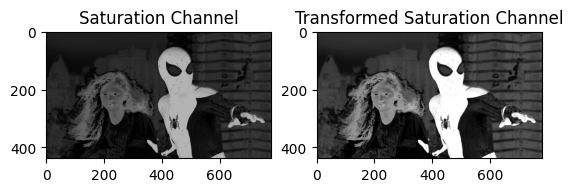

In [108]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Saturation Channel')

ax[1].imshow(transformed_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Saturation Channel')

plt.show()

In [70]:
print(hue.dtype)
print(transformed_saturation.dtype)
print(value.dtype)
        

uint8
uint8
uint8


Text(0.5, 1.0, 'Histogram of Equalized Image')

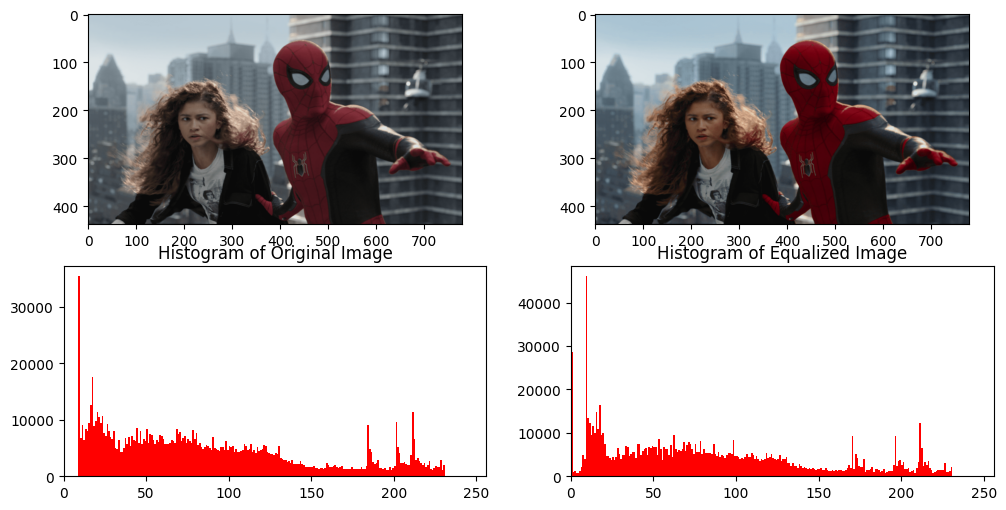

In [109]:
corrected_hsv = cv2.merge([hue, transformed_saturation, value])


corrected_image_hsv = cv2.cvtColor(corrected_hsv, cv2.COLOR_HSV2BGR)

# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_hsv, cv2.COLOR_BGR2RGB))


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_hsv.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

# Question 05

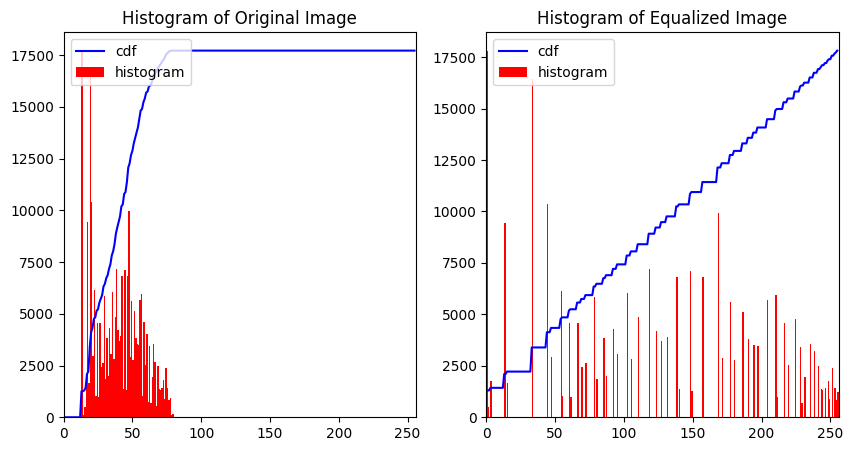

In [72]:
# importing libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread("images/shells.tif",cv.IMREAD_GRAYSCALE)


#Creating Histograms
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

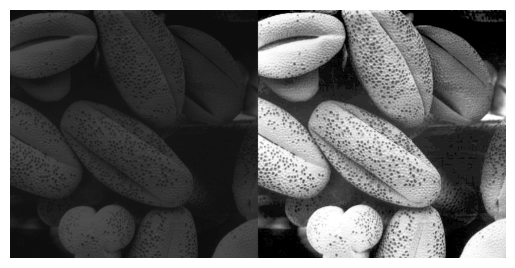

In [73]:
res=np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

# Quesion 06

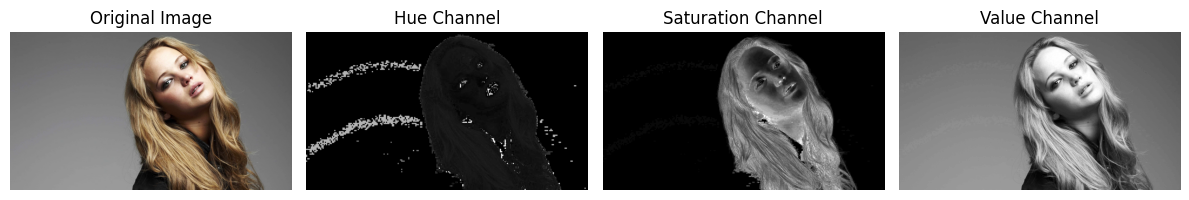

In [110]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR color space
image_bgr = cv2.imread("images/jeniffer.jpg",cv.IMREAD_ANYCOLOR)

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue, saturation, value = cv2.split(image_hsv)

# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='gray', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


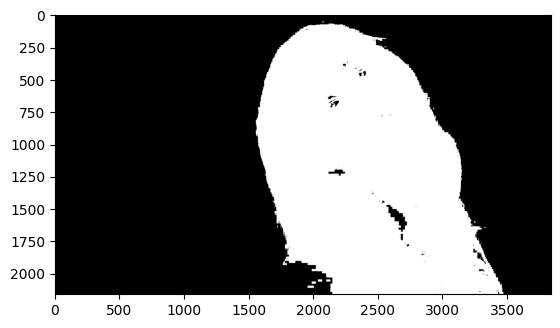

In [129]:
threshold_value = 15
_,foreground_mask = cv.threshold(saturation, threshold_value, 255, cv2.THRESH_BINARY)


# print(foreground_mask.shape)


fig,ax=plt.subplots()

ax.imshow(foreground_mask,cmap="gray")

# Display the foreground mask
# cv2.imshow('Foreground Mask', foreground_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

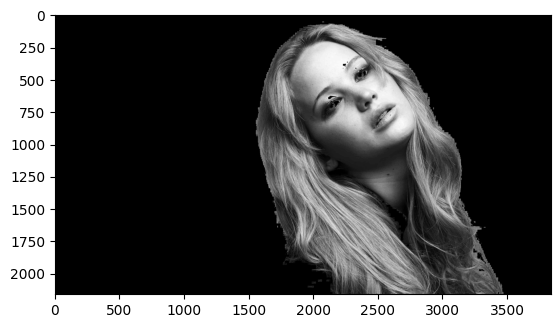

In [130]:
foreground = cv2.bitwise_and(image_bgr, image_bgr, mask=foreground_mask)

# Convert the foreground to grayscale for histogram calculation
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

fig,ax=plt.subplots()

ax.imshow(foreground_gray,cmap="gray")

plt.show()



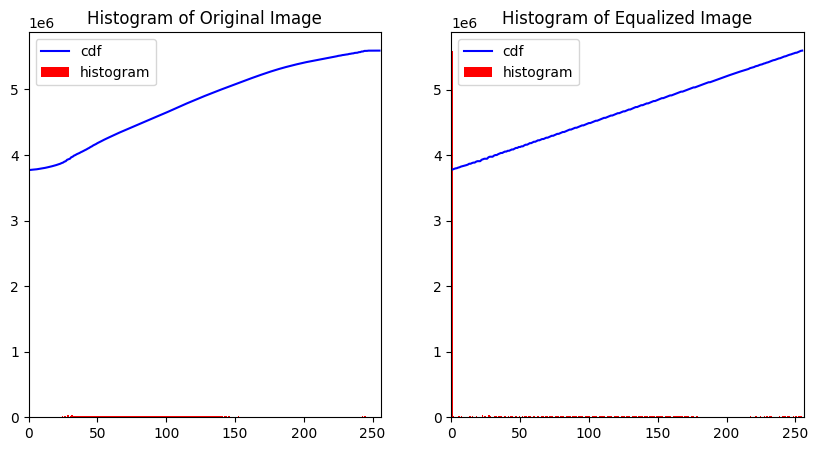

In [131]:
#Creating Histograms
hist,bins = np.histogram(foreground_gray.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(foreground_gray)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(foreground_gray.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

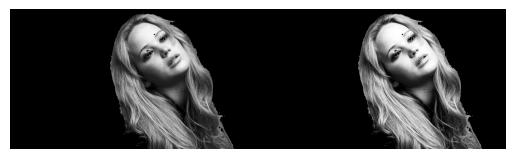

In [132]:
res=np.hstack((foreground_gray,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

Text(0.5, 1.0, 'Histogram of Equalized Image')

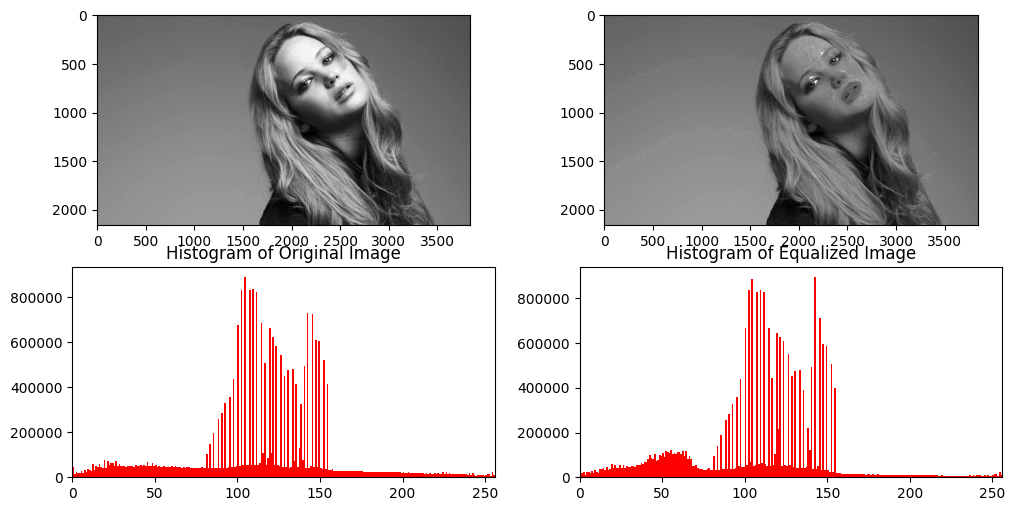

In [137]:
corrected = cv2.merge([hue,equ, value])


corrected_image = cv2.cvtColor(corrected, cv2.COLOR_HSV2BGR)

# Display and save the corrected image
# cv2.imshow('Original Image', image_bgr)
# cv2.imshow('Corrected Image', corrected_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY),cmap = "gray")
ax[0,1].imshow(cv.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY),cmap = "gray")


ax[1,0].hist(image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")